# Predicting Successful Workers
### Using models to find what makes the best employees

### 1. Exploring the Data
 First we will read in the code using Python 2.7 and Pandas

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [16]:
# Read in the worker data

xls_file = pd.ExcelFile("Origami_Data.xlsx")
worker_data = xls_file.parse('Client Information')
print "worker data read successfully!"

worker data read successfully!


Now let's to some basic exploratory analysis:

In [20]:
n_workers  = np.shape(worker_data)[0]
n_features = np.shape(worker_data)[1]
n_passed = np.shape(worker_data[worker_data['Placement Successful']=='Y'])[0]
n_failed = np.shape(worker_data[worker_data['Placement Successful']=='N'])[0]
success_rate = float(n_passed) / float(n_workers)*100
print "Total number of placements: {}".format(n_workers)
print "Number of workers who succeeded: {}".format(n_passed)
print "Number of workers who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Successful placements after 6 months: {:.2f}%".format(success_rate)

Total number of placements: 199
Number of workers who succeeded: 123
Number of workers who failed: 76
Number of features: 9
Successful placements after 6 months: 61.81%


In [21]:
# Make all state data shorthand and include gender only with M or F
worker_data['State'] = map(lambda x: x.lower(), worker_data['State'])
worker_data = worker_data.replace({'alabama':'al','florida':'fl','georgia':'ga','south carolina':'sc','louisiana':'la'}, regex=True)
states = ['al','fl','ga','la','sc']
worker_data = worker_data.loc[worker_data['State'].isin(states)]
gender = ['M','F']
worker_data = worker_data.loc[worker_data['Gender'].isin(gender)]

# Remove NaN
worker_data2 = worker_data.dropna(axis = 0, how = 'any', subset = ['Employed In Past 6 Months','Gender','Age','State','Education Level'])


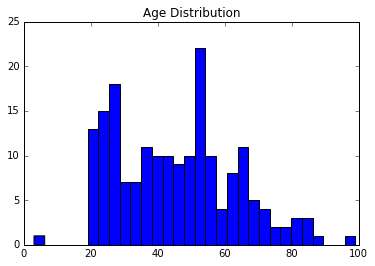

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

age = worker_data2['Age']

plt.hist(age, bins = 30,)
fig = plt.gcf()
plt.title('Age Distribution')
plt.show()

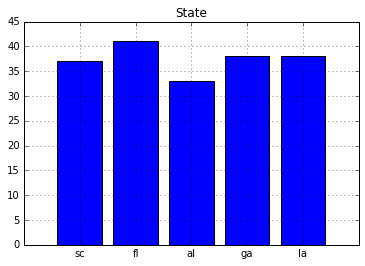

In [26]:
import collections

state = worker_data2['State']
state = collections.Counter(state)

counts = state.values()
states = state.keys()


bar_x_locations = np.arange(len(counts))
plt.bar(bar_x_locations, counts, align = 'center')
plt.xticks(bar_x_locations, states)
plt.title('State')
plt.grid()
plt.show()

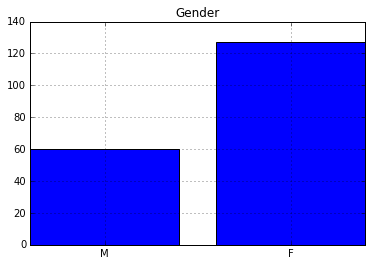

In [27]:
gender = worker_data2['Gender']

gender = collections.Counter(gender)
counts = gender.values()
states = gender.keys()


bar_x_locations = np.arange(len(counts))
plt.bar(bar_x_locations, counts, align = 'center')
plt.xticks(bar_x_locations, gender)
plt.title('Gender')
plt.grid()
plt.show()

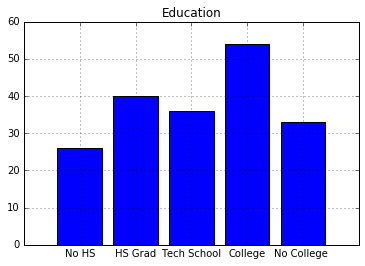

In [28]:
worker_data2 = worker_data.replace({'High School Drop Out':'No HS','College Dropout':'No College','Technical School':'Tech School','College Graduate':'College','High School Graduate':'HS Grad'}, regex=True)
education = worker_data2['Education Level']

education = collections.Counter(education)
counts = education.values()
education2 = education.keys()


bar_x_locations = np.arange(len(counts))
plt.bar(bar_x_locations, counts, align = 'center')
plt.xticks(bar_x_locations, education2)
plt.title('Education')
plt.grid()
plt.show()

